In [2]:
import pandas as pd
data=pd.read_csv("Honda_Data.csv")
print(data)

             Date  Adj_Close      Close       High        Low       Open  \
0      1980-03-17   0.547989   0.893750   0.909375   0.893750   0.893750   
1      1980-03-18   0.557569   0.909375   0.909375   0.909375   0.909375   
2      1980-03-19   0.551821   0.900000   0.900000   0.900000   0.900000   
3      1980-03-20   0.551821   0.900000   0.900000   0.900000   0.900000   
4      1980-03-21   0.551821   0.900000   0.900000   0.900000   0.900000   
...           ...        ...        ...        ...        ...        ...   
11288  2024-12-24  27.250000  27.250000  27.490000  27.030001  27.490000   
11289  2024-12-26  28.370001  28.370001  28.459999  27.860001  28.100000   
11290  2024-12-27  28.760000  28.760000  29.100000  28.580000  29.000000   
11291  2024-12-30  28.500000  28.500000  28.980000  28.400000  28.980000   
11292  2024-12-31  28.549999  28.549999  28.770000  28.370001  28.370001   

        Volume  
0        26000  
1         2000  
2         2000  
3            0  
4 

In [3]:
data.isna().sum()

Date         0
Adj_Close    0
Close        0
High         0
Low          0
Open         0
Volume       0
dtype: int64

In [7]:
from sklearn.preprocessing import LabelEncoder
b=LabelEncoder()
data["Date"]=pd.to_datetime(data["Date"])
data["Date"]=b.fit_transform(data["Date"])
print(data)

        Date  Adj_Close      Close       High        Low       Open   Volume
0          0   0.547989   0.893750   0.909375   0.893750   0.893750    26000
1          1   0.557569   0.909375   0.909375   0.909375   0.909375     2000
2          2   0.551821   0.900000   0.900000   0.900000   0.900000     2000
3          3   0.551821   0.900000   0.900000   0.900000   0.900000        0
4          4   0.551821   0.900000   0.900000   0.900000   0.900000     2000
...      ...        ...        ...        ...        ...        ...      ...
11288  11288  27.250000  27.250000  27.490000  27.030001  27.490000  1889000
11289  11289  28.370001  28.370001  28.459999  27.860001  28.100000  3216600
11290  11290  28.760000  28.760000  29.100000  28.580000  29.000000  3091700
11291  11291  28.500000  28.500000  28.980000  28.400000  28.980000  1990300
11292  11292  28.549999  28.549999  28.770000  28.370001  28.370001  1453700

[11293 rows x 7 columns]


In [8]:
x=data.drop("Volume",axis=1)
y=data["Volume"]

In [10]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.02)
print(ytrain)
print(xtrain)

4998       71600
1162      872000
8532      404100
10076    1454100
4758       50000
          ...   
4858      331600
10116     670300
8544      317700
11261    1240000
8516      421100
Name: Volume, Length: 11067, dtype: int64
        Date  Adj_Close      Close       High        Low       Open
4998    4998  13.759338  19.812500  19.875000  19.250000  19.343750
1162    1162   1.586486   2.587500   2.587500   2.537500   2.537500
8532    8532  31.782547  40.220001  40.680000  40.160000  40.570000
10076  10076  22.651434  25.580000  26.270000  25.330000  25.910000
4758    4758  11.527758  16.671875  16.781250  16.640625  16.656250
...      ...        ...        ...        ...        ...        ...
4858    4858  15.271918  22.046875  22.062500  21.937500  21.937500
10116  10116  21.344204  23.889999  24.190001  23.740000  23.740000
8544    8544  30.186295  38.200001  38.360001  38.009998  38.310001
11261  11261  25.780001  25.780001  25.950001  25.700001  25.709999
8516    8516  32.610817

In [11]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(xtrain,ytrain)
ypred=model.predict(xtest)

In [15]:
c=model.predict([[11293,1.54738593,1.45372945,1.64839043,1.47382,1.84634261]])
print(c)

[16401.20749746]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


(array([[1.764e+03, 2.480e+02, 8.800e+01, 2.200e+01, 9.000e+00, 2.000e+00,
         2.000e+00, 0.000e+00, 0.000e+00, 1.000e+00],
        [1.820e+03, 2.000e+01, 0.000e+00, 2.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
        [2.770e+02, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
        [8.010e+02, 8.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
        [1.061e+03, 6.000e+01, 2.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
        [9.380e+02, 1.590e+02, 4.000e+00, 3.000e+00, 1.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
        [1.514e+03, 1.450e+02, 1.500e+01, 1.000e+00, 2.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
        [1.470e+03, 9.700e+01, 1.200e+01, 0.000e+00, 0.000e+00, 3.000e+00,
         0.000e+00, 0.

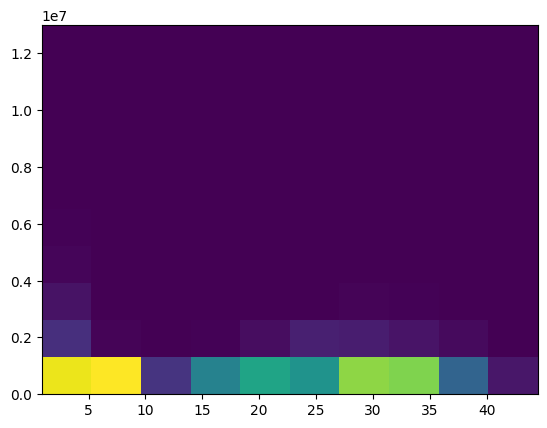

In [16]:
from matplotlib import pyplot as plt
plt.hist2d(data["Close"],data["Volume"])